In [1]:
import sys
import typing

import scipy as scp
import scipy.linalg
import numpy as np
from matplotlib import pyplot as plt

/home/mrcr4ft/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def epsMachine():
    eps = 1
    while 1 < 1 + eps:
        eps /= 2
    
    return 2 * eps

print(epsMachine())

2.220446049250313e-16


In [3]:
def RHSWithOnes(A: np.ndarray):
    x_true = np.ones(A.shape[1])
    return np.matmul(A, x_true.T)

def conditionNumber(A: np.ndarray, p: int = 2):
    condition_number = np.linalg.cond(A, p)    
    return condition_number

def relativeError(x: np.ndarray):
    x_true = np.ones(x.shape[0])
    return np.linalg.norm(x - x_true, 2) / np.linalg.norm(x_true)


matrix_by_type = {'random': lambda n: np.random.rand(n, n), 'vandermonde': lambda n: np.vander(np.arange(1, n+1), n), 'hilbert': scp.linalg.hilbert}
eps = np.finfo(np.float64).eps

def script(matrix_type: str, n_range: range):
    
    assert matrix_type in ["random", "vandermonde", "hilbert"], "Matrix type not valid!"
    
    cn_2_history = []
    cn_inf_history = []
    re_history = []
    
    for n in n_range:
        test_matrix = matrix_by_type[matrix_type](n)

        rhs = RHSWithOnes(test_matrix)

        cn_2 = conditionNumber(test_matrix, 2)
        cn_inf = conditionNumber(test_matrix, np.inf)

        if 1 / cn_2 < epsMachine():
            print("The matrix of type %s, of dimension %d x %d is ill-conditioned wrt norm 2!" % (matrix_type, n, n))

        if 1 / cn_inf < epsMachine():
            print("The matrix of type %s, of dimension %d x %d is ill-conditioned wrt norm inf!" % (matrix_type, n, n))
        
        re = relativeError(test_matrix)
        
        cn_2_history.append(cn_2)
        cn_inf_history.append(cn_inf)
        re_history.append(re)
    
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(n_range, re_history)
    plt.xlabel("n")
    plt.ylabel("relative error")

    plt.subplot(1, 2, 2)
    plt.plot(n_range, np.log(cn_2_history), c="red", label="2-norm")
    plt.plot(n_range, np.log(cn_inf_history), c="blue", label="inf-norm")
    plt.xlabel("n")
    plt.ylabel("Condition number")
    plt.legend()
    
    plt.suptitle("Logarithm of condition number and relative error as a function of n")
    plt.show()
    
    return cn_2_history, cn_inf_history, re_history

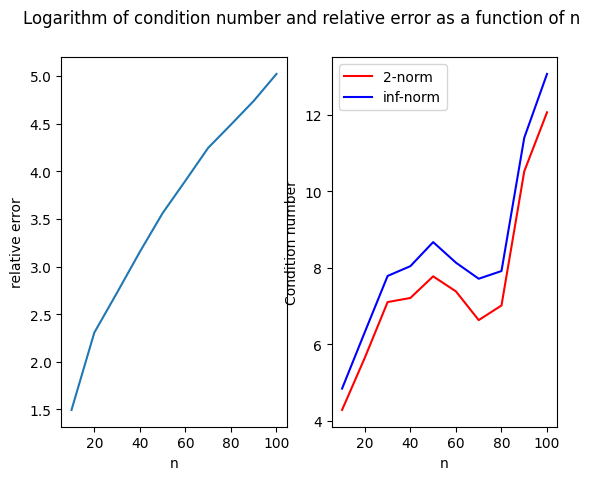

In [4]:
_, _, _ = script("random", range(10, 110, 10))

The matrix of type vandermonde, of dimension 15 x 15 is ill-conditioned wrt norm 2!
The matrix of type vandermonde, of dimension 15 x 15 is ill-conditioned wrt norm inf!
The matrix of type vandermonde, of dimension 20 x 20 is ill-conditioned wrt norm 2!
The matrix of type vandermonde, of dimension 20 x 20 is ill-conditioned wrt norm inf!
The matrix of type vandermonde, of dimension 25 x 25 is ill-conditioned wrt norm 2!
The matrix of type vandermonde, of dimension 25 x 25 is ill-conditioned wrt norm inf!
The matrix of type vandermonde, of dimension 30 x 30 is ill-conditioned wrt norm 2!
The matrix of type vandermonde, of dimension 30 x 30 is ill-conditioned wrt norm inf!


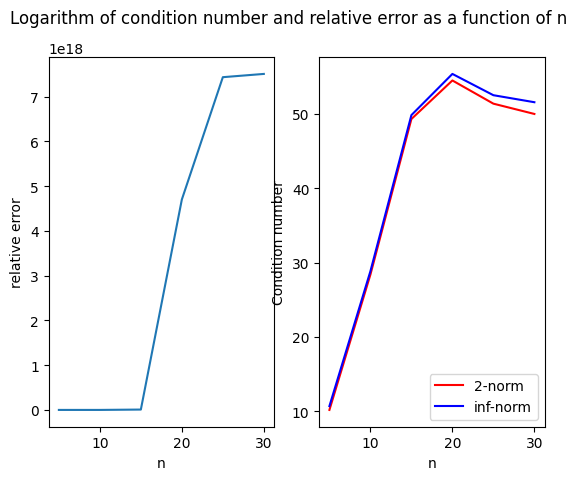

In [5]:
_, _, _ = script("vandermonde", range(5, 35, 5))

The matrix of type hilbert, of dimension 12 x 12 is ill-conditioned wrt norm 2!
The matrix of type hilbert, of dimension 12 x 12 is ill-conditioned wrt norm inf!


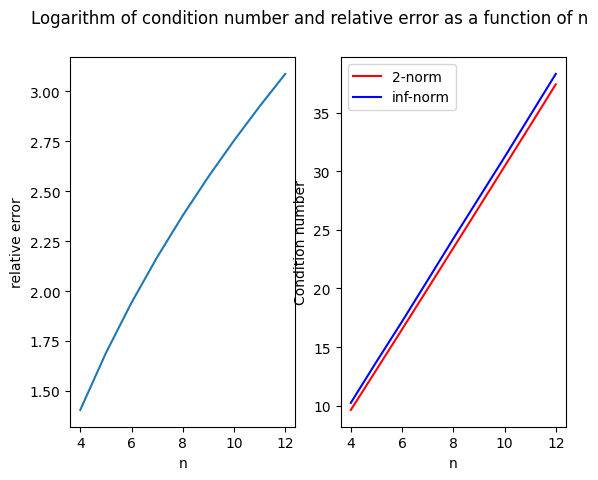

In [6]:
_, _, _ = script("hilbert", range(4, 13, 1))

In [7]:
def eulerNumber(n: int):
    return (1 + 1/n) ** n

In [8]:
def fact(n: int):
    f = 1
    for i in range(1, n):
        f *= i
    return f

for i in range(1, 22):
    print(np.abs(np.e - eulerNumber(fact(i))) / np.e)

0.26424111765711533
0.26424111765711533
0.17227125736425472
0.07234549952033957
0.020068033350820816
0.004135089113689704
0.0006935614843538216
9.918830914361521e-05
1.2400508374310801e-05
1.377850174070317e-06
1.3769367914887484e-07
1.243317175887781e-08
5.41308145284421e-08
5.3167272059597373e-08
6.860312684972099e-06
6.86031803815917e-06
0.001153921578676944
0.027080352421523145
0.5244177594445689
0.6321205588285577
0.6321205588285577


In [9]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Matrix A has rank %d" % np.linalg.matrix_rank(A))
print("Matrix B has rank %d" % np.linalg.matrix_rank(B))

print("Matrix A has eigenspectrum: %s" % str(set(np.linalg.eigvals(A))))
print("Matrix B has eigenspectrum: %s" % str(set(np.linalg.eigvals(B))))

Matrix A has rank 2
Matrix B has rank 1
Matrix A has eigenspectrum: {2.0, 5.0}
Matrix B has eigenspectrum: {0.0, 5.0}
